In [1]:
from IPython.display import display, HTML
from graphviz import Digraph

class test_graph:
    def __init__(self):
        self.nodes = {}
        self.traverse_order = None # in what order were nodes checked?
        self.next_guess = 0
        self.colors = {}

    def node(self, name):
        name = str(name).upper()
        self.nodes[name] = Node(self, name)

    def edge(self, src, dst):
        src, dst = str(src).upper(), str(dst).upper()
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])

    def _repr_svg_(self):
        g = Digraph(engine='neato')
        for n in self.nodes:
            g.node(n, fillcolor=self.colors.get(n, "white"), style="filled")
            children = self.nodes[n].children
            for i, child in enumerate(children):
                g.edge(n, child.name, penwidth=str(len(children) - i), len="1.5")
        return g._repr_image_svg_xml()

    def dfs(self, src, dst):
        src, dst = str(src).upper(), str(dst).upper()
        self.traverse_order = []
        self.next_guess = 0
        self.colors = {}
        self.visited = set()
        self.path = self.nodes[src].dfs(dst)
        display(HTML("now call .visit(???) to identify the first node explored"))
        display(self)

    def bfs(self, src, dst):
        src, dst = str(src).upper(), str(dst).upper()
        self.traverse_order = []
        self.next_guess = 0
        self.colors = {}
        self.path = self.nodes[src].bfs(dst)
        display(HTML("now call .visit(???) to identify the first node explored"))
        display(self)
    
    def visit(self, name):
        name = str(name).upper()
        if self.traverse_order == None:
            print("please call dfs or bfs first")
        if self.next_guess == len(self.traverse_order):
            print("no more nodes to explore")
            return
        self.colors = {}
        for n in self.traverse_order[:self.next_guess]:
            self.colors[n] = "yellow"
        if name == self.traverse_order[self.next_guess]:
            display(HTML("Correct..."))
            self.colors[name] = "yellow"
            self.next_guess += 1
        else:
            display(HTML("<b>Oops!</b> Please guess again."))
            self.colors[name] = "red"
        display(self)
        if self.next_guess == len(self.traverse_order):
            if self.path == None:
                display(HTML("You're done, there is no path!"))
            else:
                seq = input("What path was found? [enter nodes, comma separated]: ")
                seq = tuple(map(str.strip, seq.upper().split(",")))
                if seq == tuple(map(str.upper, self.path)):
                    print("Awesome!!!")
                else:
                    print("actually, expected was: ", ",".join(self.path))

    
class Node:
    def __init__(self, graph, name):
        self.graph = graph
        self.name = name
        self.children = []

    def __repr__(self):
        return "node %s" % self.name

    def dfs(self, dst):
        if self.name in self.graph.visited:
            return None
        
        self.graph.traverse_order.append(self.name)
        
        self.graph.visited.add(self.name)

        if self.name == dst:
            return (self.name, )
        for child in self.children:
            childpath = child.dfs(dst)
            if childpath:
                return (self.name, ) + childpath
        return None

    def backtrace(self):
        nodes = []
        node = self
        while node != None:
            nodes.append(node.name)
            node = node.back
        return tuple(reversed(nodes))

    def bfs(self, dst):
        added = set()
        todo = [self]
        self.back = None
        added.add(self.name)

        while len(todo) > 0:
            curr = todo.pop(0)
            self.graph.traverse_order.append(curr.name)

            if curr.name == dst:
                return curr.backtrace()
            else:
                for child in curr.children:
                    if not child.name in added:
                        todo.append(child)
                        child.back = curr
                        added.add(child.name)

        return None

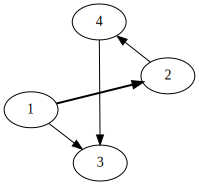

In [2]:
## Problem 1 [4-node, DFS]

g = test_graph()
g.edge(1, 2)
g.edge(4, 3)
g.edge(1, 3)
g.edge(2, 4)
g


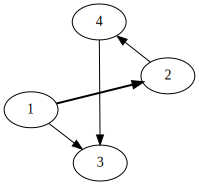

In [3]:
g.dfs(1, 3)

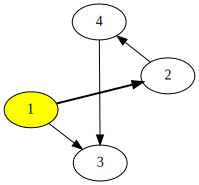

In [4]:
g.visit(1)

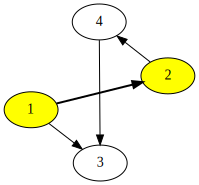

In [5]:
g.visit(2)

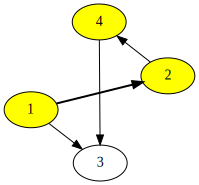

In [6]:
g.visit(4)

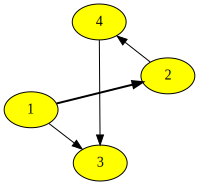

What path was found? [enter nodes, comma separated]:  1,2,4,3


Awesome!!!


In [7]:
g.visit(3)

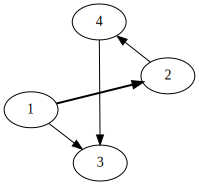

In [14]:
## Problem 2 [4-node, BFS]

g = test_graph()
g.edge(1, 2)
g.edge(4, 3)
g.edge(1, 3)
g.edge(2, 4)
g.bfs(1, 3)


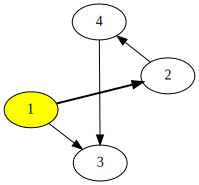

In [15]:
g.visit(1)

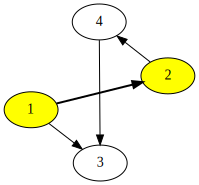

In [16]:
g.visit(2)

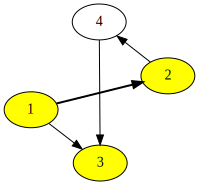

What path was found? [enter nodes, comma separated]:  1,3


Awesome!!!


In [18]:
g.visit(3)

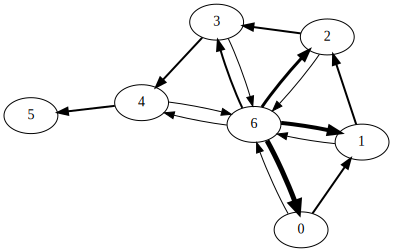

In [19]:
## Problem 3 [7-node, DFS+BFS]

g = test_graph()
for i in range(5):
    g.edge(i, i+1)
    g.edge(i, 6)
    g.edge(6, i)
g.dfs(0, 4)

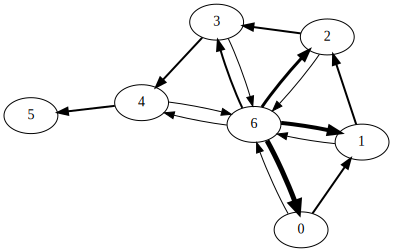

In [20]:
g.bfs(0, 4)

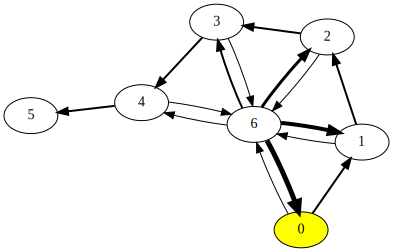

In [21]:
g.visit(0)

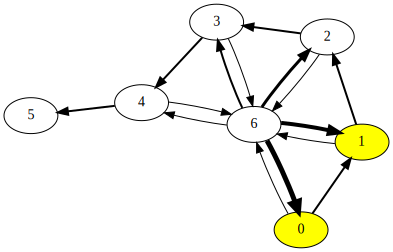

In [22]:
g.visit(1)

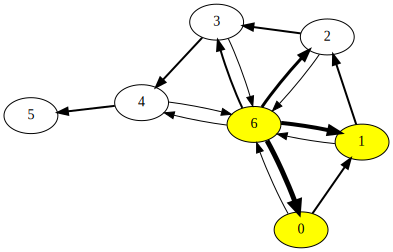

In [23]:
g.visit(6)

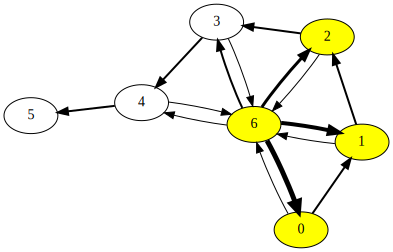

In [24]:
g.visit(2)

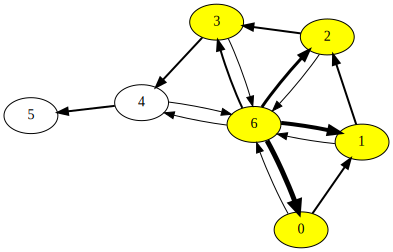

In [25]:
g.visit(3)

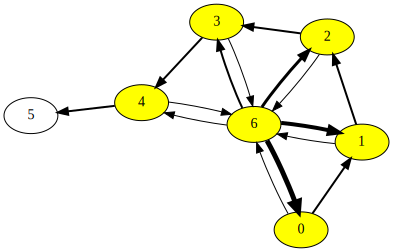

What path was found? [enter nodes, comma separated]:  0,6,4


Awesome!!!


In [26]:
g.visit(4)

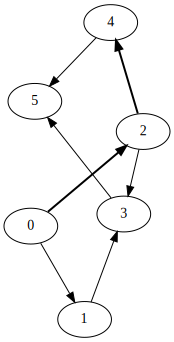

In [27]:
## Problem 4 [6-node, BFS]

g = test_graph()
for i in range(0, 4, 2):
    g.edge(i, i+2)
    g.edge(i+1, i+3)
    g.edge(i, i+1)
g.edge(4, 5)
g.bfs(2, 1)


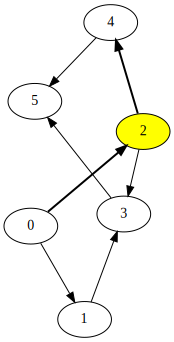

In [28]:
g.visit(2)

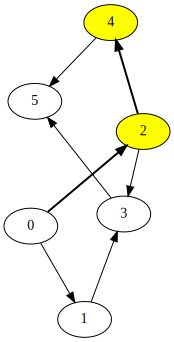

In [30]:
g.visit(4)

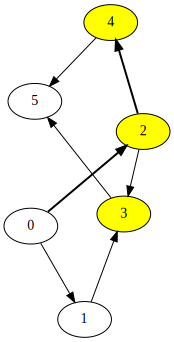

In [31]:
g.visit(3)

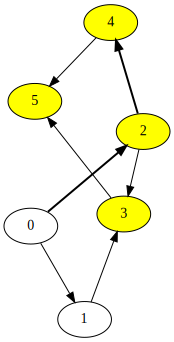

In [32]:
g.visit(5)